Import the libraries

In [0]:
from sklearn.metrics import accuracy_score
from IPython import get_ipython

import pandas as pd  # Dataframe, Series
import numpy as np  # Scientific computing package, Array
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from matplotlib import pyplot as plt
import seaborn as sns

import graphviz
import pydotplus
import io
import imageio
from scipy import misc

get_ipython().run_line_magic('matplotlib', 'inline')

Load the data

In [5]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


Load the data into a dataframe

In [6]:
data = pd.read_csv('data.csv')
data.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


Get the first couple of rows of data

In [7]:
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


Get the data types

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


Split data into testing set and training set

In [9]:
train, test = train_test_split(data, test_size=0.15)
# Prints training and test sizes
print(f'Training size: {len(train)}; Test size: {len(test)}')

Training size: 1714; Test size: 303


Get the number of rows and columns in the dataset

In [10]:
train.shape

(1714, 17)

- Organize factors that measure if the user likes/dislikes is taken from the 'target' section of the dataset

- If the target value == 1, select tempo(user liked the song), if the target value == 0(user disliked the song)

- Variables that correspond to factors determining whether or not the user liked the song
- Plot the values of positive and negative features

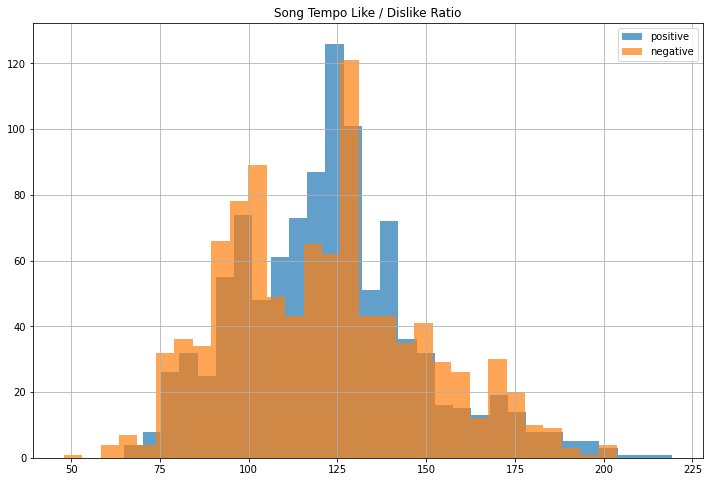

In [11]:
pos_tempo = data[data['target'] == 1]['tempo']
neg_tempo = data[data['target'] == 0]['tempo']
pos_dance = data[data['target'] == 1]['danceability']
neg_dance = data[data['target'] == 0]['danceability']
pos_duration = data[data['target'] == 1]['duration_ms']
neg_duration = data[data['target'] == 0]['duration_ms']
pos_loudness = data[data['target'] == 1]['loudness']
neg_loudness = data[data['target'] == 0]['loudness']
pos_speechiness = data[data['target'] == 1]['speechiness']
neg_speechiness = data[data['target'] == 0]['speechiness']
pos_valence = data[data['target'] == 1]['valence']
neg_valence = data[data['target'] == 0]['valence']
pos_energy = data[data['target'] == 1]['energy']
neg_energy = data[data['target'] == 0]['energy']
pos_acousticness = data[data['target'] == 1]['acousticness']
neg_acousticness = data[data['target'] == 0]['acousticness']
pos_key = data[data['target'] == 1]['key']
neg_key = data[data['target'] == 0]['key']
pos_instrumentalness = data[data['target'] == 1]['instrumentalness']
neg_instrumentalness = data[data['target'] == 0]['instrumentalness']

fig = plt.figure(figsize=(12, 8))
plt.title('Song Tempo Like / Dislike Ratio')
pos_tempo.hist(alpha=0.7, bins=30, label='positive')
neg_tempo.hist(alpha=0.7, bins=30, label='negative')
plt.legend(loc='upper right')

Plot information for each feature

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier ins

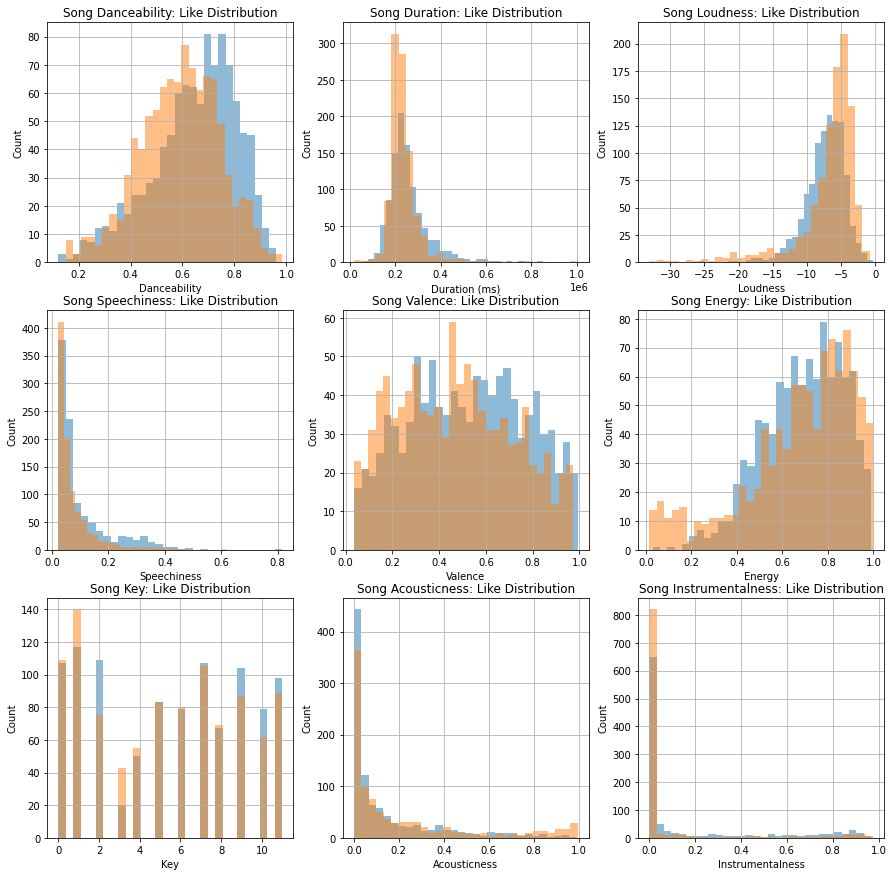

In [14]:
fig2 = plt.figure(figsize=(15, 15))

# Danceability  # Favors low danceability
ax3 = fig2.add_subplot(331)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title('Song Danceability: Like Distribution')
pos_dance.hist(alpha=0.5, bins=30)
ax4 = fig.add_subplot(331)
neg_dance.hist(alpha=0.5, bins=30)

# Duration  # Favors lower duration
ax5 = fig2.add_subplot(332)
pos_duration.hist(alpha=0.5, bins=30)
ax5.set_xlabel('Duration (ms)')
ax5.set_ylabel('Count')
ax5.set_title('Song Duration: Like Distribution')
ax6 = fig.add_subplot(332)
neg_duration.hist(alpha=0.5, bins=30)

# Loudness  #Favors low loudness
ax7 = fig2.add_subplot(333)
pos_loudness.hist(alpha=0.5, bins=30)
ax7.set_xlabel('Loudness')
ax7.set_ylabel('Count')
ax7.set_title('Song Loudness: Like Distribution')
ax8 = fig.add_subplot(333)
neg_loudness.hist(alpha=0.5, bins=30)

# Speechiness  # Favors lower speechiness
ax9 = fig2.add_subplot(334)
pos_speechiness.hist(alpha=0.5, bins=30)
ax9.set_xlabel('Speechiness')
ax9.set_ylabel('Count')
ax9.set_title('Song Speechiness: Like Distribution')
ax10 = fig.add_subplot(334)
neg_speechiness.hist(alpha=0.5, bins=30)

# Valence  # Favors high valence
ax11 = fig2.add_subplot(335)
pos_valence.hist(alpha=0.5, bins=30)
ax11.set_xlabel('Valence')
ax11.set_ylabel('Count')
ax11.set_title('Song Valence: Like Distribution')
ax12 = fig.add_subplot(335)
neg_valence.hist(alpha=0.5, bins=30)

# Energy  #Slightly avors low energy
ax13 = fig2.add_subplot(336)
pos_energy.hist(alpha=0.5, bins=30)
ax13.set_xlabel('Energy')
ax13.set_ylabel('Count')
ax13.set_title('Song Energy: Like Distribution')
ax14 = fig.add_subplot(336)
neg_energy.hist(alpha=0.5, bins=30)

# Acousticness  #Favors lower acousticness
ax16 = fig2.add_subplot(338)
pos_acousticness.hist(alpha=0.5, bins=30)
ax16.set_xlabel('Acousticness')
ax16.set_ylabel('Count')
ax16.set_title('Song Acousticness: Like Distribution')
ax16 = fig.add_subplot(338)
neg_acousticness.hist(alpha=0.5, bins=30)

# Key  #Favors keys that aren't so flat
ax15 = fig2.add_subplot(337)
pos_key.hist(alpha=0.5, bins=30)
ax15.set_xlabel('Key')
ax15.set_ylabel('Count')
ax15.set_title('Song Key: Like Distribution')
ax15 = fig.add_subplot(337)
neg_key.hist(alpha=0.5, bins=30)

# Instrumentalness  # Favors lower instrumentalness
ax17 = fig2.add_subplot(339)
pos_instrumentalness.hist(alpha=0.5, bins=30)
ax17.set_xlabel('Instrumentalness')
ax17.set_ylabel('Count')
ax17.set_title('Song Instrumentalness: Like Distribution')
ax17 = fig.add_subplot(339)
neg_instrumentalness.hist(alpha=0.5, bins=30)

Create Decision Tree Classifier

In [0]:
c = DecisionTreeClassifier(min_samples_split=100)

Define the features

In [0]:
features = ['danceability', 'loudness', 'valence', 'energy',
            'instrumentalness', 'key', 'speechiness', 'duration_ms']

Define training/test data and fitting the model to the training set

In [0]:
x_train = train[features]
y_train = train['target']

x_test = test[features]
y_test = test['target']

# Decision Tree
dt = c.fit(x_train, y_train)

Method that visualizes the decision tree using graphiz

In [0]:
def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file=f, feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = imageio.imread(path)
    plt.rcParams['figure.figsize'] = (20, 20)
    plt.imshow(img)

Visualize the decision tree

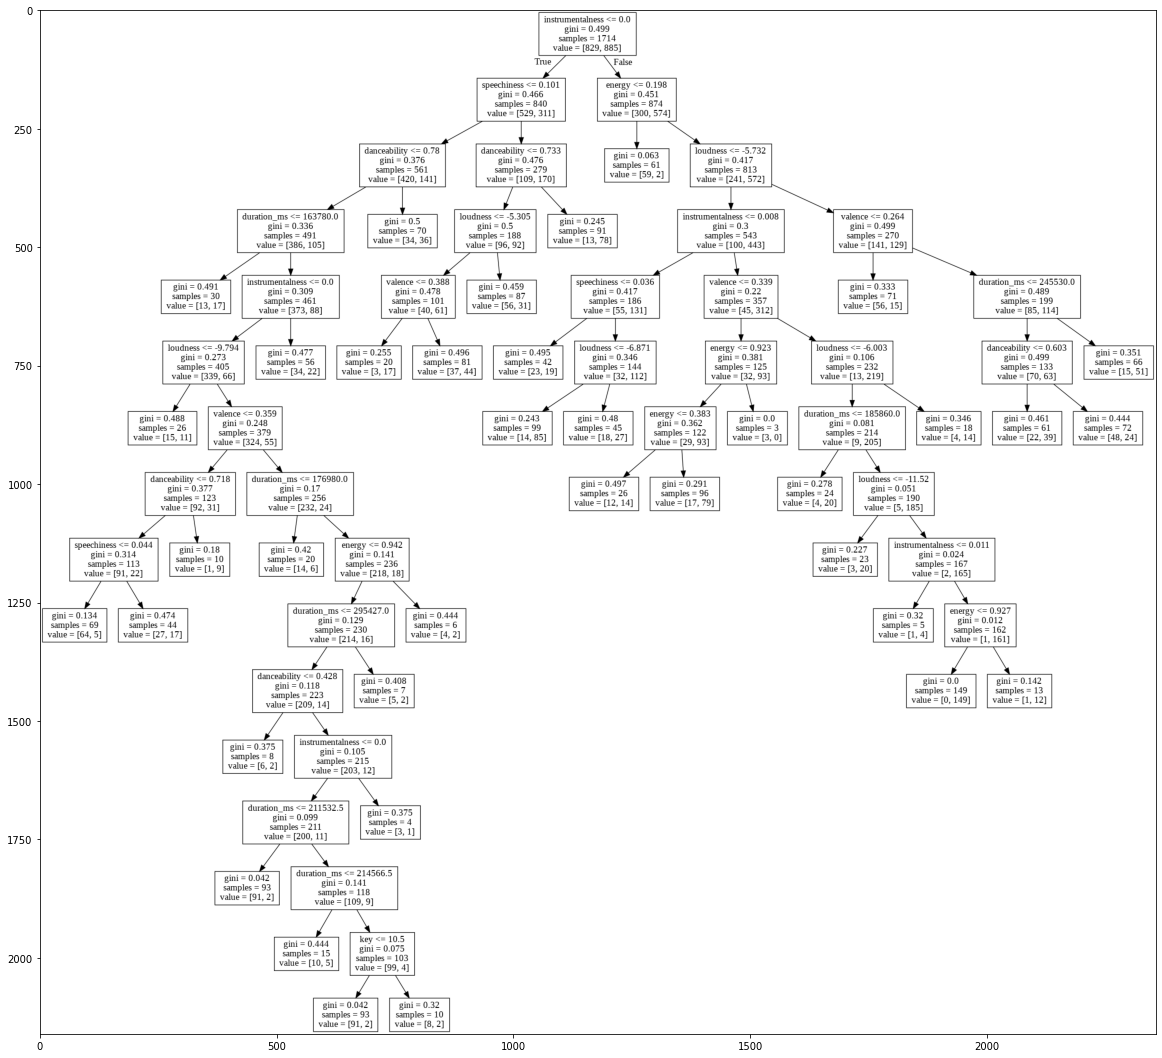

In [19]:
show_tree(dt, features, 'dec_tree_01.png')

Print the predictions

In [21]:
y_pred = c.predict(x_test)
print(y_pred)

[0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1
 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0
 1 1 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0
 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0
 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0
 0 0 0 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0
 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0
 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0
 1 0 0 1 1 1 1]


Get the model's accuracy, precision, recall and f1 score

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72       168
           1       0.65      0.74      0.69       135

    accuracy                           0.71       303
   macro avg       0.71      0.71      0.71       303
weighted avg       0.71      0.71      0.71       303

